In [21]:
# mount drive
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [22]:
import os
from glob import glob
import pyarrow.parquet as pq
import pandas as pd
import matplotlib.pyplot as plt

Reading files from 'https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page'.
All files from the year 2022 were downloaded and placed in data/ directory.

In [ ]:
file_paths_1 = glob('/data/*')


merged_trips = pd.DataFrame()  # Initialize an empty DataFrame to store merged data

for file_path in file_paths_1: # Iterating through each of the files
    trips = pq.read_table(file_path)
    trips = trips.to_pandas()
    trips['pickup_year'] = trips.tpep_pickup_datetime.dt.year # Create a new column named pickup_year
    trips = trips[trips['pickup_year']==2022] # Filter rows with year 2022 and assign it to trips dataframe

# 'trips' dataframe has all the records from the year 2022.

In [ ]:
trips = trips.drop_duplicates().reset_index(drop=True) # Drop duplicates from the files

In [5]:
trips.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,pickup_year
0,0,0,0,1,2022-10-01 00:03:41,2022-10-01 00:18:39,1.0,1.70,1.0,N,...,9.5,3.0,0.5,2.65,0.0,0.3,15.95,2.5,0.0,2022
1,1,1,1,2,2022-10-01 00:14:30,2022-10-01 00:19:48,2.0,0.72,1.0,N,...,5.5,0.5,0.5,0.00,0.0,0.3,9.30,2.5,0.0,2022
2,2,2,2,2,2022-10-01 00:27:13,2022-10-01 00:37:41,1.0,1.74,1.0,N,...,9.0,0.5,0.5,2.06,0.0,0.3,12.36,0.0,0.0,2022
3,3,3,3,1,2022-10-01 00:32:53,2022-10-01 00:38:55,0.0,1.30,1.0,N,...,6.5,3.0,0.5,2.05,0.0,0.3,12.35,2.5,0.0,2022
4,4,4,4,1,2022-10-01 00:44:55,2022-10-01 00:50:21,0.0,1.00,1.0,N,...,6.0,0.5,0.5,1.80,0.0,0.3,9.10,0.0,0.0,2022


In [6]:
trips.shape

(39655537, 23)

In [7]:
trips.columns

Index(['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'VendorID',
       'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count',
       'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'airport_fee', 'pickup_year'],
      dtype='object')

In [8]:
trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39655537 entries, 0 to 39655536
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0.2           int64  
 1   Unnamed: 0.1           int64  
 2   Unnamed: 0             int64  
 3   VendorID               int64  
 4   tpep_pickup_datetime   object 
 5   tpep_dropoff_datetime  object 
 6   passenger_count        float64
 7   trip_distance          float64
 8   RatecodeID             float64
 9   store_and_fwd_flag     object 
 10  PULocationID           int64  
 11  DOLocationID           int64  
 12  payment_type           int64  
 13  fare_amount            float64
 14  extra                  float64
 15  mta_tax                float64
 16  tip_amount             float64
 17  tolls_amount           float64
 18  improvement_surcharge  float64
 19  total_amount           float64
 20  congestion_surcharge   float64
 21  airport_fee            float64
 22  pickup_year     

##Initial Data Transformations

1. Removing unwanted columns

In [9]:
trips.drop(columns=['Unnamed: 0.2','Unnamed: 0','Unnamed: 0.1'],inplace=True)

2. Converting pick up date and drop off date to datetime format


In [13]:
trips['tpep_pickup_datetime_converted'] = pd.to_datetime(trips['tpep_pickup_datetime'])
trips['tpep_dropoff_datetime_converted'] = pd.to_datetime(trips['tpep_dropoff_datetime'])
trips['pickup_month'] = trips.tpep_pickup_datetime_converted.dt.month

3. Creating a new column named payment_type_name


In [15]:
# Map the payment type names to their corresponding integers
payment_type_name = {
    1:"Credit card",
    2:"Cash",
    3:"No charge",
    4:"Dispute",
    5:"Unknown",
    6:"Voided trip"
}

# Convert payment_type column to the corresponding payment type names
trips['payment_type_name'] = trips['payment_type'].map(payment_type_name)

4.  Removing rows with fare amount < 0


In [18]:
trips = trips.query('fare_amount >= 0.0')

## EDA

1. No. of trips per month

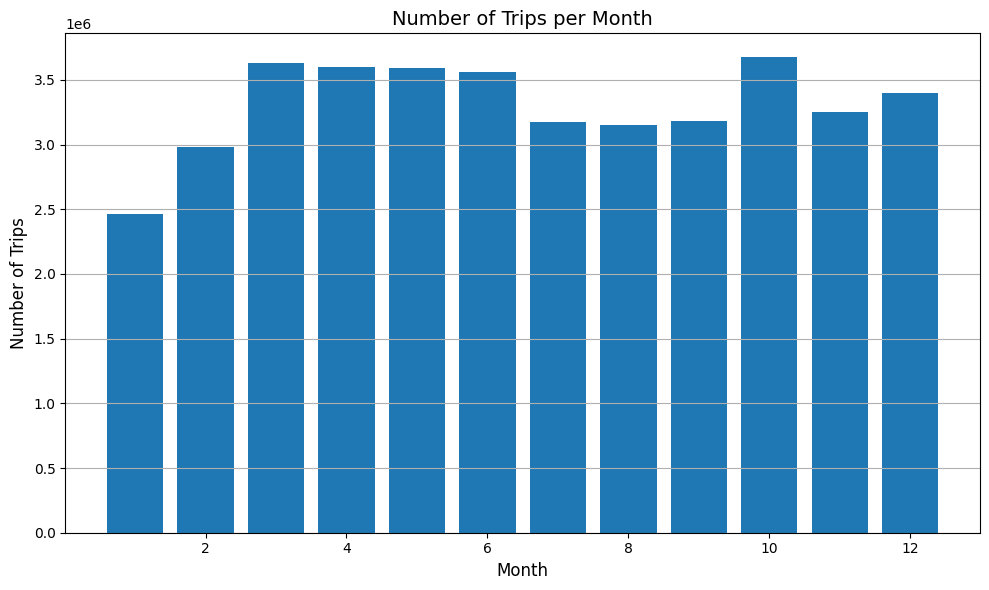

In [11]:
monthly_trip_counts = trips['pickup_month'].value_counts()

# Create a plot
plt.figure(figsize=(10, 6))
plt.bar(monthly_trip_counts.index, monthly_trip_counts.values)

# Customize the plot
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Trips', fontsize=12)
plt.title('Number of Trips per Month', fontsize=14)
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()

Analysis: In the year 2022, maximum number of trips were in October and minimum number of trips were in January in New York city.

In [12]:
del monthly_trip_counts # Delete the dataframe monthly_trip_counts to reduce memory usage


2: Distribution of payment types

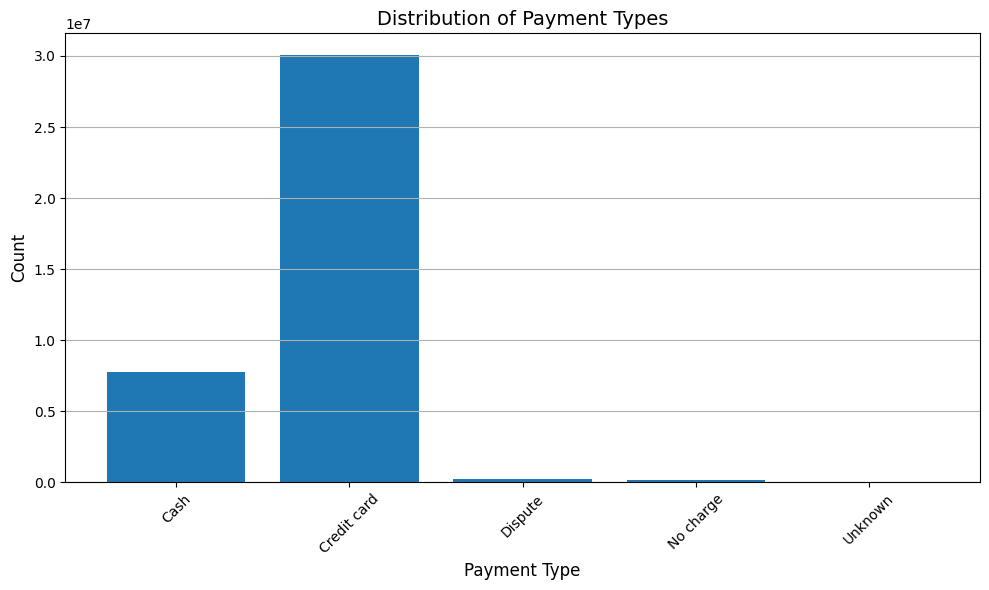

In [16]:
# Count the occurrences of each payment type
payment_type_counts = trips['payment_type_name'].value_counts()

# Sort the data in the order of payment types
payment_type_counts = payment_type_counts.sort_index()

# Create a plot
plt.figure(figsize=(10, 6))
plt.bar(payment_type_counts.index, payment_type_counts.values)

# Customize the plot
plt.xlabel('Payment Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Payment Types', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()

In [17]:
del payment_type_counts # Delete the dataframe payment_type_counts to reduce memory usage


Most of the trips used credit cards for payment followed by cash.

3. Average fare amount per month

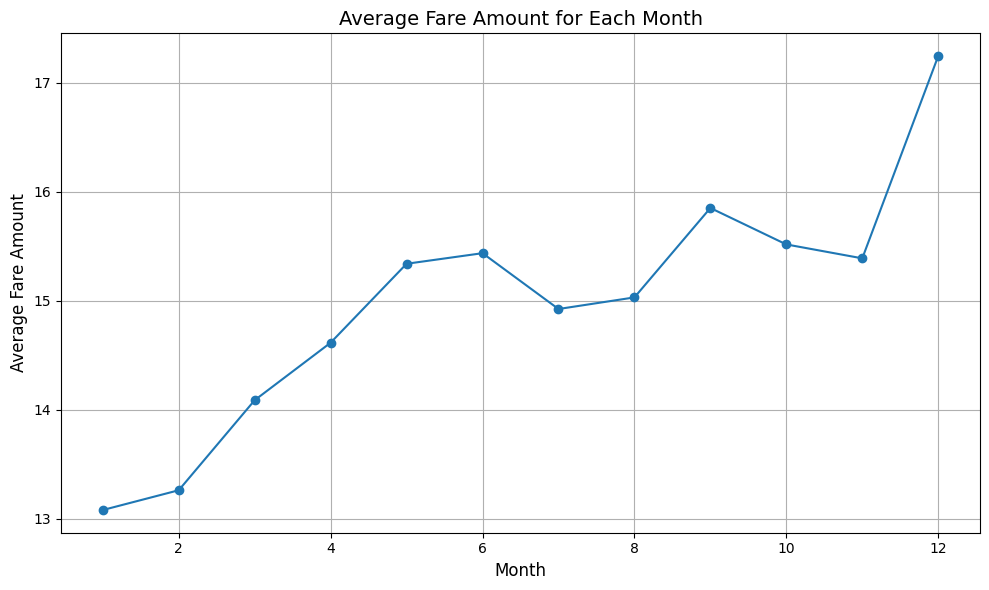

In [20]:
# Group data by month and calculate the average fare amount for each month
avg_fare_per_month = trips.groupby('pickup_month')['fare_amount'].mean()

# Create a plot
plt.figure(figsize=(10, 6))
plt.plot(avg_fare_per_month.index, avg_fare_per_month.values, marker='o')

# Customize the plot
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Fare Amount', fontsize=12)
plt.title('Average Fare Amount for Each Month', fontsize=14)
# plt.xticks(range(1, 13), calendar.month_name[1:13], rotation=45)  # Replace 1:13 with your desired months
plt.grid()

# Show the plot
plt.tight_layout()
plt.show()

Analysis: The average fare peaked in the month of December at approximately 17.5$.

## Data Modeling: Converting dataframe into fact and dimension tables

1. datetime_dim

In [ ]:
datetime_dim = trips[['tpep_pickup_datetime','tpep_dropoff_datetime']].reset_index(drop=True)
datetime_dim['tpep_pickup_datetime'] = datetime_dim['tpep_pickup_datetime']
datetime_dim['pick_hour'] = datetime_dim['tpep_pickup_datetime'].dt.hour
datetime_dim['pick_day'] = datetime_dim['tpep_pickup_datetime'].dt.day
datetime_dim['pick_month'] = datetime_dim['tpep_pickup_datetime'].dt.month
datetime_dim['pick_year'] = datetime_dim['tpep_pickup_datetime'].dt.year
datetime_dim['pick_weekday'] = datetime_dim['tpep_pickup_datetime'].dt.weekday

datetime_dim['tpep_dropoff_datetime'] = datetime_dim['tpep_dropoff_datetime']
datetime_dim['drop_hour'] = datetime_dim['tpep_dropoff_datetime'].dt.hour
datetime_dim['drop_day'] = datetime_dim['tpep_dropoff_datetime'].dt.day
datetime_dim['drop_month'] = datetime_dim['tpep_dropoff_datetime'].dt.month
datetime_dim['drop_year'] = datetime_dim['tpep_dropoff_datetime'].dt.year
datetime_dim['drop_weekday'] = datetime_dim['tpep_dropoff_datetime'].dt.weekday


datetime_dim['datetime_id'] = datetime_dim.index

# datetime_dim = datetime_dim.rename(columns={'tpep_pickup_datetime': 'datetime_id'}).reset_index(drop=True)
datetime_dim = datetime_dim[['datetime_id', 'tpep_pickup_datetime', 'pick_hour', 'pick_day', 'pick_month', 'pick_year', 'pick_weekday',
                             'tpep_dropoff_datetime', 'drop_hour', 'drop_day', 'drop_month', 'drop_year', 'drop_weekday']]
#
datetime_dim.head()

2. passenger_count_dim

In [ ]:
passenger_count_dim = trips[['passenger_count']].reset_index(drop=True)
passenger_count_dim['passenger_count_id'] = passenger_count_dim.index
passenger_count_dim = passenger_count_dim[['passenger_count_id','passenger_count']]

3. trip_distance_dim

In [ ]:
trip_distance_dim = trips[['trip_distance']].reset_index(drop=True)
trip_distance_dim['trip_distance_id'] = trip_distance_dim.index
trip_distance_dim = trip_distance_dim[['trip_distance_id','trip_distance']]

4. rate_code_dim

In [ ]:
rate_code_type = {
    1:"Standard rate",
    2:"JFK",
    3:"Newark",
    4:"Nassau or Westchester",
    5:"Negotiated fare",
    6:"Group ride"
}

rate_code_dim = trips[['RatecodeID']].reset_index(drop=True)
rate_code_dim['rate_code_id'] = rate_code_dim.index
rate_code_dim['rate_code_name'] = rate_code_dim['RatecodeID'].map(rate_code_type)
rate_code_dim = rate_code_dim[['rate_code_id','RatecodeID','rate_code_name']]

5. pickup_location_dim

In [ ]:
pickup_location_dim = trips[['pickup_longitude', 'pickup_latitude']].reset_index(drop=True)
pickup_location_dim['pickup_location_id'] = pickup_location_dim.index
pickup_location_dim = pickup_location_dim[['pickup_location_id','pickup_latitude','pickup_longitude']]


dropoff_location_dim = trips[['dropoff_longitude', 'dropoff_latitude']].reset_index(drop=True)
dropoff_location_dim['dropoff_location_id'] = dropoff_location_dim.index
dropoff_location_dim = dropoff_location_dim[['dropoff_location_id','dropoff_latitude','dropoff_longitude']]

6. payment_type_dim

In [ ]:
payment_type_name = {
    1:"Credit card",
    2:"Cash",
    3:"No charge",
    4:"Dispute",
    5:"Unknown",
    6:"Voided trip"
}
payment_type_dim = trips[['payment_type']].reset_index(drop=True)
payment_type_dim['payment_type_id'] = payment_type_dim.index
payment_type_dim['payment_type_name'] = payment_type_dim['payment_type'].map(payment_type_name)
payment_type_dim = payment_type_dim[['payment_type_id','payment_type','payment_type_name']]


7. fact_table

In [ ]:
fact_table = trips.merge(passenger_count_dim, left_on='trip_id', right_on='passenger_count_id') \
             .merge(trip_distance_dim, left_on='trip_id', right_on='trip_distance_id') \
             .merge(rate_code_dim, left_on='trip_id', right_on='rate_code_id') \
             .merge(pickup_location_dim, left_on='trip_id', right_on='pickup_location_id') \
             .merge(dropoff_location_dim, left_on='trip_id', right_on='dropoff_location_id')\
             .merge(datetime_dim, left_on='trip_id', right_on='datetime_id') \
             .merge(payment_type_dim, left_on='trip_id', right_on='payment_type_id') \
             [['trip_id','VendorID', 'datetime_id', 'passenger_count_id',
               'trip_distance_id', 'rate_code_id', 'store_and_fwd_flag', 'pickup_location_id', 'dropoff_location_id',
               'payment_type_id', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
               'improvement_surcharge', 'total_amount']]